<a href="https://colab.research.google.com/github/TheElmoro/Random-Codes/blob/main/HandsOnMLexcercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Creating Arrays (Page 4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
#1D array (vector)
v = np.array([1, 2, 3])

M = np.array([[1,2,3,],
             [4, 5, 6]])

print("vector:", v, "shape:", v.shape)
print("matrix:\n", M, "shape:", M.shape)

vector: [1 2 3] shape: (3,)
matrix:
 [[1 2 3]
 [4 5 6]] shape: (2, 3)


#Axes Explained - (Page 5)

In [ ]:
M = np.array([[1,2,3,],
             [4, 5, 6]])

print(M.sum(axis=0))
print(M.sum(axis=1))

[5 7 9]
[ 6 15]


In [ ]:
X = np.array([[1, 2, 3], [4, 5, 6]])

v = np.array([1, 0,-1])

print(X + v)

[[2 2 2]
 [5 5 5]]


In [ ]:
a = np. arange (6)
b = a. reshape (2, 3)
print (b)

[[0 1 2]
 [3 4 5]]


In [ ]:
a = np. array ([2 , 3, 4])
b = np. array ([5 , 6, 7])
print (a @ b)

56


#Broadcasting

In [ ]:
import numpy as np
X = np. array ([[1 , 2, 3],
[4, 5, 6]] , dtype = float )
mu = X. mean ( axis =0)
X_centered = X - mu
print (mu)
print ( X_centered )

[2.5 3.5 4.5]
[[-1.5 -1.5 -1.5]
 [ 1.5  1.5  1.5]]


#Mini dataset

In [ ]:
import pandas as pd
from io import StringIO
csv = StringIO (""" size, bedrooms, price
650 ,1 ,120000
800 ,2 ,155000
900 ,2 ,180000
1200 ,3 ,240000
1500 ,3 ,310000
1800 ,4 ,360000
""")
df = pd.read_csv(csv)
df.head()

,size,bedrooms,price
0,650,1,120000
1,800,2,155000
2,900,2,180000
3,1200,3,240000
4,1500,3,310000


#Loading and Inspecting Data

In [ ]:
import pandas as pd
# Assuming you have saved the google sheet as a csv file in the same folder
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/housing.csv")
print(df.head())
print(df.describe())
print(df.info())
print(df.isna().sum())

   size  bedroom   price
0   650        1  120000
1   800        2  155000
2   900        2  180000
3  1200        3  240000
4  1500        3  310000
              size   bedroom          price
count     6.000000  6.000000       6.000000
mean   1141.666667  2.500000  227500.000000
std     443.189200  1.048809   93367.553251
min     650.000000  1.000000  120000.000000
25%     825.000000  2.000000  161250.000000
50%    1050.000000  2.500000  210000.000000
75%    1425.000000  3.000000  292500.000000
max    1800.000000  4.000000  360000.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   size     6 non-null      int64
 1   bedroom  6 non-null      int64
 2   price    6 non-null      int64
dtypes: int64(3)
memory usage: 276.0 bytes
None
size       0
bedroom    0
price      0
dtype: int64


In [ ]:
total_rooms = df["size"]
subset = df[["size","price"]]

print("First row of the dataframe:")
print(df.iloc[0])
print("\nFirst row using .loc:")
print(df.loc[0])

First row of the dataframe:
size          650
bedroom         1
price      120000
Name: 0, dtype: int64

First row using .loc:
size          650
bedroom         1
price      120000
Name: 0, dtype: int64


In [ ]:
print(df.corr())

             size   bedroom     price
size     1.000000  0.957358  0.998683
bedroom  0.957358  1.000000  0.954815
price    0.998683  0.954815  1.000000


In [ ]:
print(df.describe())
print(df.isna().sum())
print(df.corr( numeric_only = True))

              size   bedroom          price
count     6.000000  6.000000       6.000000
mean   1141.666667  2.500000  227500.000000
std     443.189200  1.048809   93367.553251
min     650.000000  1.000000  120000.000000
25%     825.000000  2.000000  161250.000000
50%    1050.000000  2.500000  210000.000000
75%    1425.000000  3.000000  292500.000000
max    1800.000000  4.000000  360000.000000
size       0
bedroom    0
price      0
dtype: int64
             size   bedroom     price
size     1.000000  0.957358  0.998683
bedroom  0.957358  1.000000  0.954815
price    0.998683  0.954815  1.000000


#Scatter Plot Example

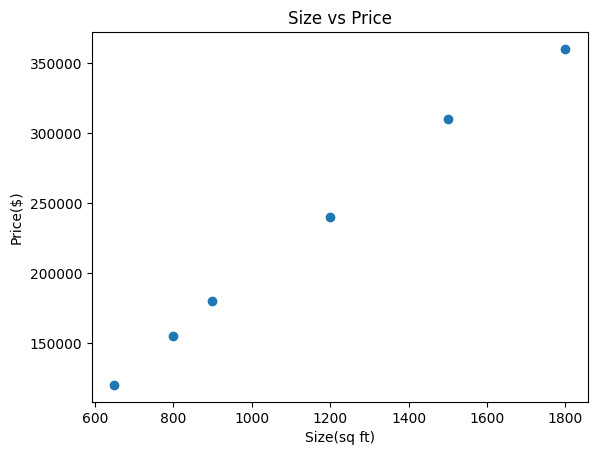

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df["size"], df["price"])
plt.xlabel("Size(sq ft)")
plt.ylabel("Price($)")
plt.title("Size vs Price")
plt.show()

#Build the Design Matrix

In [ ]:
import numpy as np
x = df["size"].to_numpy().reshape(-1, 1)
y = df["price"].to_numpy().reshape(-1, 1)

X = np.hstack([np.ones((x.shape[0], 1)), x])
print(X[:3], y[:3], sep="\n")

[[  1. 650.]
 [  1. 800.]
 [  1. 900.]]
[[120000]
 [155000]
 [180000]]


#Fit via Normal Equation

In [ ]:
XtX = X.T @ X
Xty = X.T @ y
w = np.linalg.inv(XtX) @ Xty
w0, w1 = float(w[0]), float(w[1])
print(f"Intercept={w0:.2f}, Slope ={w1:.2f}")

Intercept=-12700.47, Slope =210.39


/tmp/ipython-input-3726567468.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w0, w1 = float(w[0]), float(w[1])


#Visualize the Fit

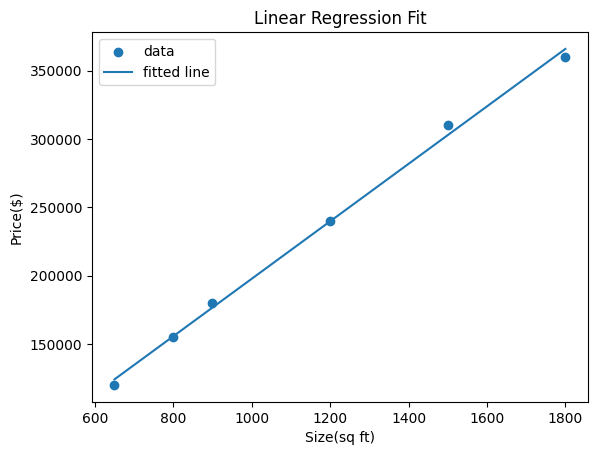

In [ ]:
y_hat = X @ w
plt.scatter(df["size"], df["price"],label ="data")
xs = np. linspace (df["size"].min(), df["size"].max(), 100)
ys = w0 + w1 * xs
plt.plot(xs, ys, label ="fitted line")
plt.xlabel("Size(sq ft)")
plt.ylabel("Price($)")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()

#Train/Test Split & Metrics

In [ ]:
train = df.iloc[:-2]
test = df.iloc[-2:]
Xtr = np.hstack([np.ones((len(train),1)), train ["size"].to_numpy().reshape(-1 ,1)])
ytr = train["price"].to_numpy().reshape(-1 ,1)
Xte = np.hstack([np.ones((len(test),1)),test["size"].to_numpy().reshape(-1 ,1)])
yte = test ["price"].to_numpy().reshape(-1 ,1)

w = np.linalg.inv(Xtr.T @ Xtr) @ (Xtr.T @ ytr)

yhat_te = Xte @ w

#Implement GD in 12 Lines

In [ ]:
X = np.hstack([np.ones((len(df),1)), df["size"].to_numpy ().reshape(-1 ,1)])
y = df["price"].to_numpy().reshape(-1 ,1)
w = np.zeros((2 ,1))
alpha = 1e-7
for step in range (20000) :
  y_hat = X @ w
  grad = (2/len(X))*(X.T @ (y_hat - y))
  w -= alpha * grad
print(w.ravel())

[ -5.51066375 200.51550599]


In [ ]:
y_pred = X @ w

mse = np.mean((y - y_pred)**2)
ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - y.mean())**2)
r2 = 1 - (ss_res / ss_tot)

print("MSE:", mse)
print("R^2:", r2)


MSE: 37100972.64683694
R^2: 0.9948928973700941


#Added Bedrooms (2 Features)

In [ ]:
X = np.hstack([np.ones((len(df),1)),
               df["size"].to_numpy().reshape(-1 ,1),
               df["bedroom"].to_numpy().reshape(-1 ,1)])
y = df["price"].to_numpy().reshape(-1 ,1)
w = np.zeros((3 ,1))
alpha = 1e-7
for step in range (20000) :
  y_hat = X @ w
  grad = (2/len(X))*(X.T @ (y_hat - y))
  w -= alpha * grad
print(w.ravel())

[ -5.51064623 200.51437945   0.51247696]


In [ ]:
y_pred = X @ w
mse = np.mean((y - y_pred)**2)

ss_res = np.sum((y - y_pred)**2)
ss_tot = np.sum((y - y.mean())**2)
r2 = 1 - (ss_res / ss_tot)

print("MSE:", mse)
print("R^2:", r2)


MSE: 37100954.335172616
R^2: 0.9948928998907706
